In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train=pd.read_csv('/content/train.csv')
print(train.shape)
train.head()

(88858, 10)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
test=pd.read_csv('/content/test.csv')
print(test.shape)
test.head()

(59310, 9)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
train['Number_Weeks_Used'].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

In [ ]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [ ]:
test['Number_Weeks_Used'].value_counts()

20.0    2645
30.0    2583
25.0    2086
40.0    1927
35.0    1617
        ... 
63.0      29
65.0      27
64.0      19
66.0      13
67.0       5
Name: Number_Weeks_Used, Length: 64, dtype: int64

 *missing:Number_weeks_used*   > *64 unique values*

 train: *79858/88858*
 
 test: *53417/59310*

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

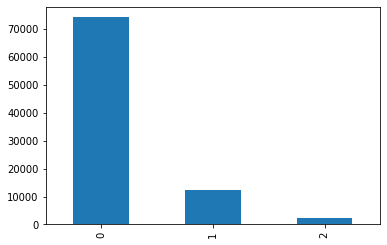

In [ ]:
train['Crop_Damage'].value_counts().plot(kind='bar');
train['Crop_Damage'].value_counts()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


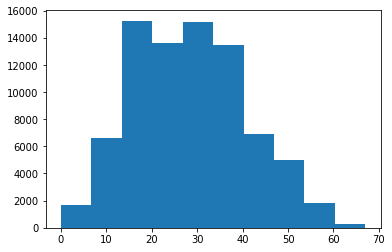

In [ ]:
plt.hist(train['Number_Weeks_Used']);

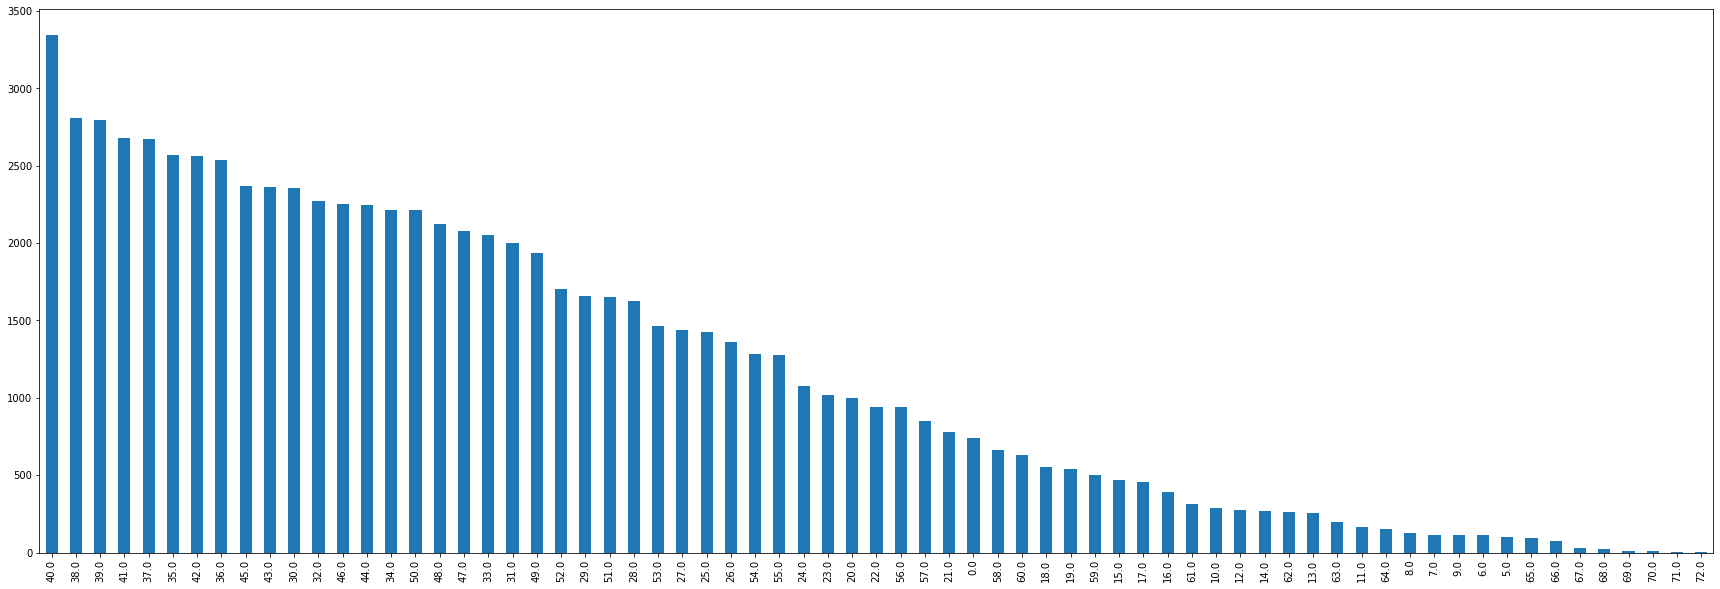

In [ ]:
p=train['Number_Weeks_Used']+train['Number_Weeks_Quit']
p.value_counts().plot(kind='bar',figsize=(30,10));

In [ ]:
nulltr= train[train['Number_Weeks_Used'].isnull()].index.tolist()
for i in nulltr:
  if train['Number_Doses_Week'][i]==0:
    train['Number_Weeks_Used'][i]=0

  else:
    train['Number_Weeks_Used'][i]=42-train['Number_Weeks_Quit'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


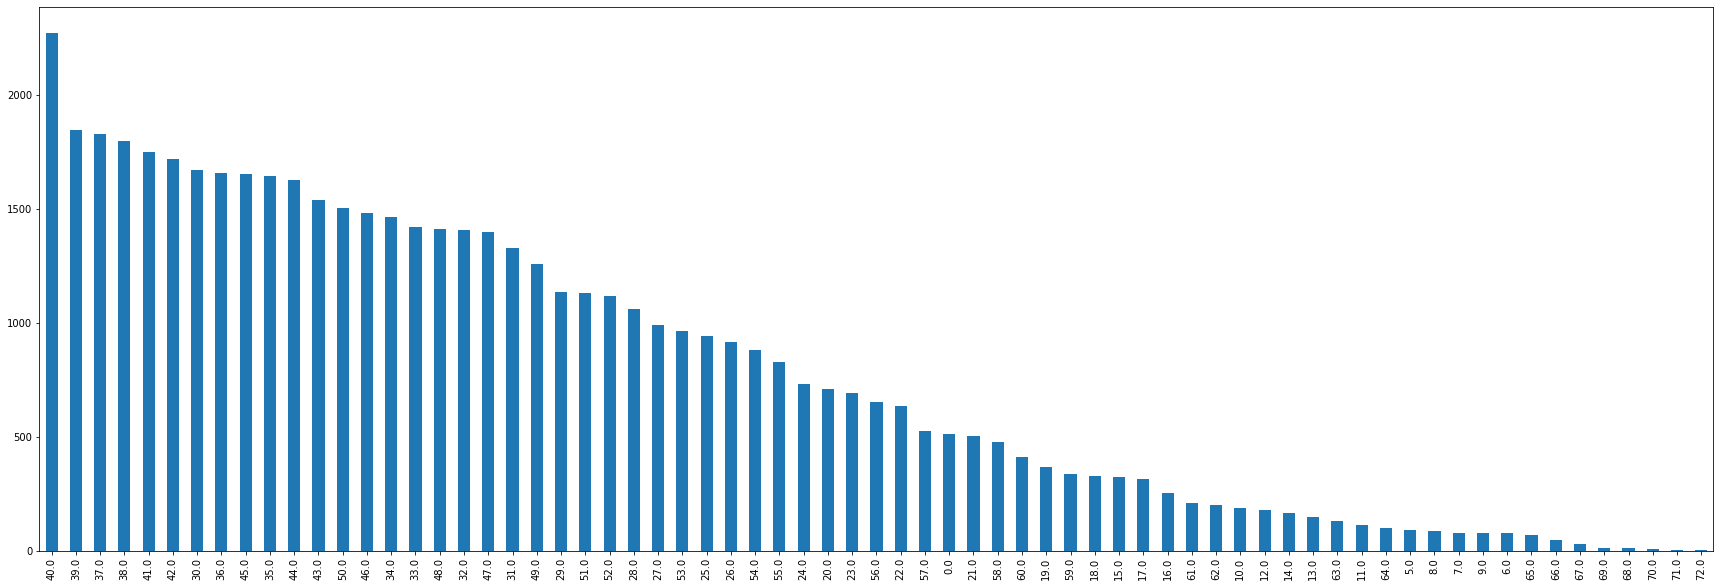

In [ ]:
p=test['Number_Weeks_Used']+test['Number_Weeks_Quit']
p.value_counts().plot(kind='bar',figsize=(30,10));

In [ ]:
nullte= test[test['Number_Weeks_Used'].isnull()].index.tolist()
for i in nullte:
  if test['Number_Doses_Week'][i]==0:
    test['Number_Weeks_Used'][i]=0

  else:
    test['Number_Weeks_Used'][i]=42-test['Number_Weeks_Quit'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        59310 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


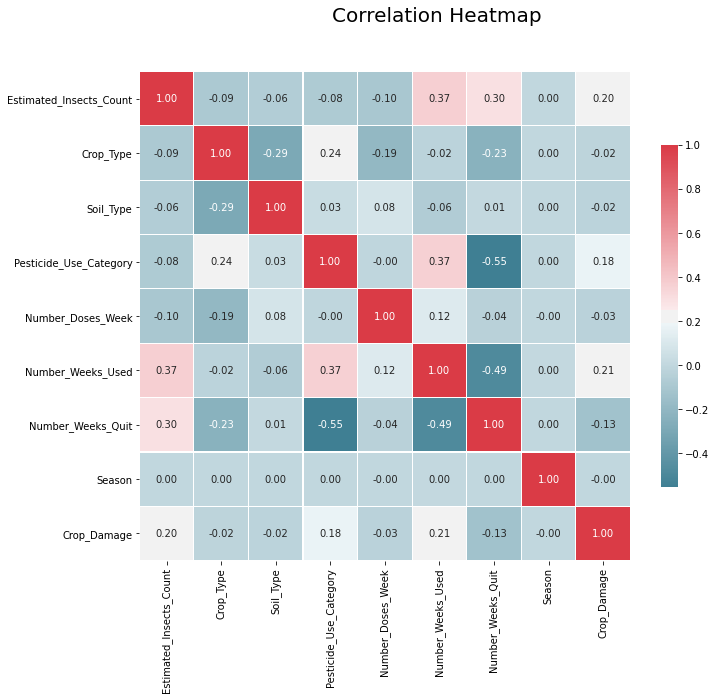

In [ ]:
import seaborn as sns
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

t= f.suptitle('Correlation Heatmap', fontsize=20)
# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
           # center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
hm = sns.heatmap(corr, annot=True, ax=ax, cmap=cmap,fmt='.2f',
                 linewidths=.1,cbar_kws={"shrink": .7})

In [ ]:
dep_var = 'Crop_Damage'
cat_names = [	'Pesticide_Use_Category' ]
cont_names = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

***using SVC***

In [ ]:
y=train['Crop_Damage']
y.shape

(88858,)

In [ ]:
train=train.drop(columns=['Crop_Damage','ID'])
test=test.drop(columns='ID')
print(train.shape)
train.head()

(88858, 8)


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [ ]:
test.shape

(59310, 8)

In [ ]:
X=pd.get_dummies(train,columns=cat_names)
X.shape

(88858, 10)

In [ ]:
Xt=pd.get_dummies(test,columns=cat_names)
Xt.shape

(59310, 10)

**  **

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
class_weights= {0:0.89897850367626425, 1:1.709531557182564, 2:4.725742928750448}

In [ ]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state =0,class_weight=class_weights ,degree=2,C=10)
classifier2.fit(x_train, y_train)

In [ ]:
y_pred= classifier2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14848,     0,     0],
       [ 2473,     0,     0],
       [  451,     0,     0]])

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
print('f1-score :', f1_score(y_test,y_pred, average='weighted'))
print('accuracy:', accuracy_score(y_test,y_pred))

In [ ]:
#CV
from xgboost import XGBClassifier
classifier2=SVC(kernel = 'rbf', random_state =0,class_weight=class_weights ,degree=2,C=10)
classifier2.fit(x_train, y_train)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier2, X=X , y=y , cv=10) 
print(acc)
print(acc.mean())
acc.std()

### Random Forest

In [ ]:
class_weights= {0:0.89897850367626425, 1:1.709531557182564, 2:4.725742928750448}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 25,max_depth=4, criterion = 'entropy', class_weight=random_state = 0)
classifier3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred= classifier3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14820,    28,     0],
       [ 2364,   109,     0],
       [  422,    29,     0]])

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
print('f1-score :', f1_score(y_test,y_pred, average='weighted'))
print('accuracy:', accuracy_score(y_test,y_pred))

f1-score : 0.7745249072330733
accuracy: 0.8400292595093405


In [ ]:
from sklearn.utils import class_weight
'''class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(y_train),
                                             y_train))'''
class_weights= [0.89897850367626425, 1.409531557182564, 2.025742928750448]

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

In [ ]:
set(w_array)

{0.8989785036762642, 1.409531557182564, 2.025742928750448}

In [ ]:
class_weights

[0.39897850367626425, 2.409531557182564, 12.725742928750448]

In [ ]:
from xgboost import XGBClassifier
classifier4=XGBClassifier(n_estimators=625,reg_lambda=0.22,max_depth=5,tree_method='gpu_hist')
classifier4.fit(x_train, y_train,sample_weight=w_array)

In [ ]:
y_pred= classifier4.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
print('f1-score :', f1_score(y_test,y_pred, average='weighted'))
print('accuracy:', accuracy_score(y_test,y_pred))

f1-score : 0.7798147255307921
accuracy: 0.8401980643709206


In [ ]:
#CV
from xgboost import XGBClassifier
classifier4=XGBClassifier(n_estimators=625,reg_lambda=0.1,max_depth=4,tree_method='gpu_hist')
classifier4.fit(x_train, y_train)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier4, X=X , y=y , cv=10) 
print(acc)
print(acc.mean())
acc.std()

In [ ]:
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

In [ ]:
model = LGBMClassifier(boosting_type='gbdt',objective='multiclass',num_class=3,metric='multi_logloss',subsample=0.8,
                       n_estimators=665,max_depth=10,learning_rate=0.03,min_data_in_leaf=10,
                       lambda_l2=0.3,random_seed=42,class_weight= {0: 0.5, 1: 0.36, 2: 0.3},verbose=0)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("done")

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.845 (0.001)


In [ ]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.5, 1: 0.36, 2: 0.3},
               colsample_bytree=1.0, importance_type='split', lambda_l2=0.3,
               learning_rate=0.03, max_depth=10, metric='multi_logloss',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=10, min_split_gain=0.0, n_estimators=665,
               n_jobs=-1, num_class=3, num_leaves=31, objective='multiclass',
               random_seed=42, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.8, subsample_for_bin=200000,
               subsample_freq=0, verbose=0)

In [ ]:
yhat = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
cm

array([[14713,   134,     1],
       [ 2163,   309,     1],
       [  373,    78,     0]])

In [ ]:
(14713+309)/177772


0.0845014962986297

In [ ]:
target_names = ['alive', 'damaged by pesticides', 'damaged by other reason']
print(classification_report(y_test, yhat,target_names=target_names))

                         precision    recall  f1-score   support

                  alive       0.85      0.99      0.92     14848
  damaged by pesticides       0.59      0.12      0.21      2473
damaged by other reason       0.00      0.00      0.00       451

               accuracy                           0.85     17772
              macro avg       0.48      0.37      0.37     17772
           weighted avg       0.80      0.85      0.79     17772



In [ ]:
ys=model.predict(Xt)

In [ ]:
s=pd.read_csv('/content/test.csv')
sub=pd.DataFrame(s['ID'])
sub.head()

,ID
0,F00000002
1,F00000007
2,F00000011
3,F00000013
4,F00000014


In [ ]:
sub['Crop_Damage']=ys
sub.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [ ]:
sub['Crop_Damage'].value_counts()

0    57570
1     1736
2        4
Name: Crop_Damage, dtype: int64

In [ ]:
sub.to_csv("sub.csv",index=False)